<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации</a></span><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>

# Описание проекта


В данном проекте мы будем выступать в качестве аналитиков компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание данных

### Таблица users (информация о пользователях):
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tariff` — название тарифного плана

### Таблица calls (информация о звонках):
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

### Таблица messages (информация о сообщениях):
* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

### Таблица internet (информация об интернет-сессиях):
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

### Таблица tariffs (информация о тарифах):
* `tariff_name`  — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Изучение общей информации

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
calls = pd.read_csv('/3_calls.csv') #информация о звонках
internet = pd.read_csv('/3_internet.csv',index_col=0) #информация об интернет-сессиях
messages = pd.read_csv('/3_messages.csv') #информация о сообщениях
tariffs = pd.read_csv('/3_tariffs.csv') #информация о тарифах
users = pd.read_csv('/3_users.csv') #информация о пользователях


In [ ]:
calls.head() #выводим на экран 5 первых строк датасета `calls`

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [ ]:
calls.info() # выводим общую информацию о данных датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [ ]:
calls['call_date'] = pd.to_datetime(calls['call_date'],format = '%Y-%m-%d') #тип данных в колонке `call_date` (дата звонка) приведем к формату даты.
calls.info() #выводим общую информацию о данных датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


Округлим продолжительность звонков до минуты, по условиям тарифа окруцгление происходит в большую сторону

In [ ]:
calls['duration'] = np.ceil(calls['duration'])
calls['duration']

0          0.0
1          0.0
2          3.0
3         14.0
4          6.0
          ... 
202602     1.0
202603    19.0
202604    11.0
202605     5.0
202606    20.0
Name: duration, Length: 202607, dtype: float64

In [ ]:
internet.head() #выводим на экран 5 первых строк датасета `internet`

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [ ]:
internet.info() #выводим общую информацию о данных датасета

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [ ]:
internet['session_date'] = pd.to_datetime(internet['session_date'],format = '%Y-%m-%d') #тип данных в колонке `session_date` (дата интерет-сессии) приведем к формату даты.
internet.info() #выводим общую информацию о данных датасета

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


In [ ]:
messages.tail() #выводим на экран 5 первых строк датасета `messages`

,id,message_date,user_id
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


In [ ]:
messages.info() #выводим общую информацию о данных датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [ ]:
messages['message_date'] = pd.to_datetime(messages['message_date'],format = '%Y-%m-%d') #тип данных в колонке `message_date` (дата сообщения) приведем к формату даты.
messages.info() #выводим общую информацию о данных датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [ ]:
tariffs #выводим данные датасета на экран

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
tariffs.info() #выводим общую информацию о данных датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Типы данных в таблице `tariffs` отражены корректно, изменения вносить не нужно.

In [ ]:
users.head() #выводим на экран  5 первых строк датасета `users`

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


##  Подготовка данных

In [ ]:
users['reg_date'] = pd.to_datetime(users['reg_date'],format = '%Y-%m-%d') #тип данных в колонке `reg_date` (дата подключения тарифа)приведем к формату даты.
users['churn_date'] = pd.to_datetime(users['churn_date'],format = '%Y-%m-%d') #тип данных в колонке `churn_date` (дата прекращения пользования тарифом)приведем к формату даты.
users.info() #выводим общую информацию о данных датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам.

In [ ]:
calls['month'] = calls['call_date'].dt.month #добавим колонку с номером месяца, в котором был сделан звонок
calls_new = calls.groupby(['user_id','month'])['duration'].agg(['count','sum']) #группировка датасета по `user_id` и месяцу и добавление колонок с количеством и общей длительностью звонков, сделанных за месяц
calls_new.columns = ['calls_qty','calls_duration']
calls_new
#type(calls_new)

calls_qty  calls_duration
user_id month                           
1000    5             22           159.0
        6             43           172.0
        7             47           340.0
        8             52           408.0
        9             58           466.0
...                  ...             ...
1498    10            41           247.0
1499    9              9            70.0
        10            68           449.0
        11            74           612.0
        12            69           492.0

[3174 rows x 2 columns]

Посчитаем для каждого пользователя количество отправленных сообщений по месяцам.

In [ ]:
messages['month'] = messages['message_date'].dt.month #добавим колонку с номером месяца, в котором было отправлено сообщение.
messages_new = messages.groupby(['user_id','month'])['id'].agg(['count']) #группировка датасета по `user_id` и месяцу и добавление колонки с суммарным количеством сообщений, отправленных за месяц
messages_new.columns = ['messages_qty']
messages_new

messages_qty
user_id month              
1000    5                22
        6                60
        7                75
        8                81
        9                57
...                     ...
1498    10               42
1499    9                11
        10               48
        11               59
        12               66

[2717 rows x 1 columns]

Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам.

In [ ]:
internet['month'] = internet['session_date'].dt.month #добавление столбца с месяцем использования траффика
internet_new = internet.groupby(['user_id','month'])['mb_used'].agg(['sum']) #группировка датасета по `user_id` и месяцу и добавление колонки с суммарным траффиком, использованным за месяц
internet_new.columns = ['traffic_used'] #переименовываем столбец с данными
internet_new

traffic_used
user_id month              
1000    5           2253.49
        6          23233.77
        7          14003.64
        8          14055.93
        9          14568.91
...                     ...
1498    10         20579.36
1499    9           1845.75
        10         17788.51
        11         17963.31
        12         13055.58

[3203 rows x 1 columns]

In [ ]:
gd = calls_new.join([messages_new,internet_new],how='outer').reset_index() #объединение датасетов `calls_new`, `messages_new` и `internet_new` в один датасет
gd['tariff'] = gd.merge(users, on='user_id')['tariff'] #добавим в датасет столбец с типом используемого клиентом тарифа
gd.head()

,user_id,month,calls_qty,calls_duration,messages_qty,traffic_used,tariff
0,1000,5,22.0,159.0,22.0,2253.49,ultra
1,1000,6,43.0,172.0,60.0,23233.77,ultra
2,1000,7,47.0,340.0,75.0,14003.64,ultra
3,1000,8,52.0,408.0,81.0,14055.93,ultra
4,1000,9,58.0,466.0,57.0,14568.91,ultra


In [ ]:
# check 
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   int64  
 2   calls_qty       3174 non-null   float64
 3   calls_duration  3174 non-null   float64
 4   messages_qty    2717 non-null   float64
 5   traffic_used    3203 non-null   float64
 6   tariff          3214 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 175.9+ KB


In [ ]:
gd[gd['traffic_used'].isnull()==True] #на этом этапе обнаружил несколько NaN значений в колонке `traffic_used`

,user_id,month,calls_qty,calls_duration,messages_qty,traffic_used,tariff
1722,1273,5,24.0,220.0,21.0,NaN,ultra
1723,1273,6,40.0,230.0,38.0,NaN,ultra
1724,1273,7,44.0,253.0,37.0,NaN,ultra
1725,1273,8,53.0,253.0,41.0,NaN,ultra
1726,1273,9,33.0,223.0,32.0,NaN,ultra
1727,1273,10,40.0,315.0,35.0,NaN,ultra
1728,1273,11,45.0,272.0,29.0,NaN,ultra
1729,1273,12,41.0,260.0,39.0,NaN,ultra
2387,1377,2,23.0,179.0,2.0,NaN,ultra
2500,1392,2,2.0,13.0,3.0,NaN,ultra


Заменим NaN значения на нули:

In [ ]:
gd['traffic_used'] = gd['traffic_used'].fillna(0)
gd[gd['traffic_used'].isnull()==True] #проверим - остались ли NaN значения

,user_id,month,calls_qty,calls_duration,messages_qty,traffic_used,tariff


In [ ]:
# check 
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   int64  
 2   calls_qty       3174 non-null   float64
 3   calls_duration  3174 non-null   float64
 4   messages_qty    2717 non-null   float64
 5   traffic_used    3214 non-null   float64
 6   tariff          3214 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 175.9+ KB


<div class = "alert alert-info" style="border-left: 7px solid blue">
Посмотрим пропуски по столбцам calls_duration и messages_qty. Для того, чтобы исключить возможность того, что пользователь уже не является активным, посмотрим отсутствие данных сразу в обоих столбцах.
</div>

In [ ]:
gd[(gd['calls_duration'].isnull()==True)&(gd['messages_qty'].isnull()==True)]

,user_id,month,calls_qty,calls_duration,messages_qty,traffic_used,tariff
3064,1476,4,NaN,NaN,NaN,530.78,ultra


<div class = "alert alert-info" style="border-left: 7px solid blue">
Одна строка по таким условиям нашлась, но прри этом пользователь расходовал интернет траффик, значит, что он также был активным в рассматриваемом периоде. Можно сделать вывод, что каждый пользователь из выборки был активным, но пользовался каким-то одним типом связи. Имеющиеся в стобцах calls_duration и messages_qty пропуски заполним нулями, что будет означать, что абонент не пользовался таким типом связи в рассматриваемый период времени.
   </div>

In [ ]:
gd['calls_duration'] = gd['calls_duration'].fillna(0)
gd['messages_qty'] = gd['messages_qty'].fillna(0)
gd['calls_qty'] = gd['calls_qty'].fillna(0)
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   int64  
 2   calls_qty       3214 non-null   float64
 3   calls_duration  3214 non-null   float64
 4   messages_qty    3214 non-null   float64
 5   traffic_used    3214 non-null   float64
 6   tariff          3214 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 175.9+ KB



Все пропуски теперь заполнены.


Посчитаем для каждого пользователя помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет- трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

In [ ]:
def revenue_calc(row): #функция для расчета помесячной выручки с каждого пользователя
    result = 0
    smart_traffic_included = 15 # объем траффика, включенного в тариф smart, Гб
    smart_traffic_over_payment = 200 #плата за Гб интернета сверх тарифного плана
    ultra_traffic_included = 30 # объем траффика, включенного в тариф ultra, Гб
    ultra_traffic_over_payment = 150 #плата за Гб интернета сверх тарифного плана
    if row['tariff'] == 'smart': # ветка для пользователей тарифа smart
        revenue_per_calls = (row['calls_duration'] - tariffs['minutes_included'][0])*tariffs['rub_per_minute'][0] #считаем плату за минуты, израсходованные сверх тарифа
        revenue_per_messages = (row['messages_qty'] -  tariffs['messages_included'][0])*tariffs['rub_per_message'][0] #считаем плату за сообщения, отправленные сверх тарифа
        revenue_per_traffic = np.ceil((row['traffic_used']/1024 - smart_traffic_included))*smart_traffic_over_payment  #считаем плату за Гб, израсходованные сверх тарифа           
        if revenue_per_calls > 0:
            result = result + revenue_per_calls 
        if revenue_per_messages>0:
            result = result + revenue_per_messages
        if revenue_per_traffic>0:
            result = result + revenue_per_traffic
        result = result + tariffs['rub_monthly_fee'][0]         
    else: # ветка для пользователей тарифа ultra
        revenue_per_calls = (row['calls_duration'] - tariffs['minutes_included'][1])*tariffs['rub_per_minute'][1] #считаем плату за минуты, израсходованные сверх тарифа
        revenue_per_messages = (row['messages_qty'] - tariffs['messages_included'][1])*tariffs['rub_per_message'][1] #считаем плату за сообщения, отправленные сверх тарифа
        revenue_per_traffic = np.ceil((row['traffic_used']/1024 - ultra_traffic_included))*ultra_traffic_over_payment #считаем плату за Гб, израсходованные сверх тарифа  
        if revenue_per_calls > 0:
            result = result + revenue_per_calls
        if revenue_per_messages>0:
            result = result + revenue_per_messages
        if revenue_per_traffic>0:
            result = result + revenue_per_traffic
        result = result + tariffs['rub_monthly_fee'][1] 
    return (result)
    
gd['revenue'] = gd.apply(revenue_calc,axis=1) #применяем функцию к датасету
gd.tail(10) #выводим на экран 10 последних стрк полученного датасет с новой колонкой `revenue`, отображающей помесячную выручку для каждого пользователя

,user_id,month,calls_qty,calls_duration,messages_qty,traffic_used,tariff,revenue
3204,1497,11,64.0,371.0,14.0,14156.08,smart,550.0
3205,1497,12,71.0,545.0,17.0,19918.60,smart,1685.0
3206,1498,7,23.0,175.0,20.0,7476.24,smart,550.0
3207,1498,8,57.0,400.0,62.0,24235.21,smart,2386.0
3208,1498,9,59.0,471.0,44.0,22134.41,smart,1950.0
3209,1498,10,41.0,247.0,42.0,20579.36,smart,1750.0
3210,1499,9,9.0,70.0,11.0,1845.75,smart,550.0
3211,1499,10,68.0,449.0,48.0,17788.51,smart,1150.0
3212,1499,11,74.0,612.0,59.0,17963.31,smart,1513.0
3213,1499,12,69.0,492.0,66.0,13055.58,smart,598.0


## Анализ данных

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

In [ ]:
print ('Среднее значение по продолжительности разговоров в месяц для пользователей тарифа `smart`:',gd[gd['tariff']=='smart']['calls_duration'].mean().round()) 
print ('Cреднее значение по продолжительности разговоров в месяц для пользователей тарифа `ultra`:', gd[gd['tariff']=='ultra']['calls_duration'].mean().round())

Среднее значение по продолжительности разговоров в месяц для пользователей тарифа `smart`: 418.0
Cреднее значение по продолжительности разговоров в месяц для пользователей тарифа `ultra`: 527.0


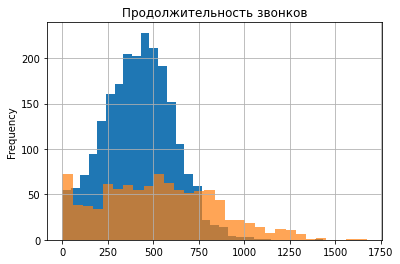

In [ ]:
gd[gd['tariff']=='smart']['calls_duration'].plot(kind = 'hist', bins=30, grid=True,title='smart').set_title('Продолжительность звонков'); #гистограмма для звонков по тарифу smart
gd[gd['tariff']=='ultra']['calls_duration'].plot(kind = 'hist', bins=30, grid=True, alpha=0.7); #гистограмма для звонков по тарифу ultra

In [ ]:
variance_calls_smart = np.var(gd[gd['tariff']=='smart']['calls_duration']) #дисперсия для данных по продолжительности разговоров пользователей тарифа `smart`
print(f'Дисперсия для длительности звонков по тарифу smart: {round(variance_calls_smart)} минут')
print (f'Стандартное отклонение для длительности звонков по тарифу smart: {round(variance_calls_smart**0.5)} минут') #стандартное отклонение для продолжительности разговоров пользователей тарифа `smart`

Дисперсия для длительности звонков по тарифу smart: 36203 минут
Стандартное отклонение для длительности звонков по тарифу smart: 190 минут


In [ ]:
variance_calls_ultra = np.var(gd[gd['tariff']=='ultra']['calls_duration']) #дисперсия для данных по продолжительности разговоров пользователей тарифа `ultra`
print (f'Дисперсия для длительности звонков по тарифу ultra:{round(variance_calls_ultra)} минут')
print (f'Стандартное отклонение для длительности звонков по тарифу ultra: {round(variance_calls_ultra**0.5)} минут') #стандартное отклонение для продолжительности разговоров пользователей тарифа `ultra`

Дисперсия для длительности звонков по тарифу ultra:100771 минут
Стандартное отклонение для длительности звонков по тарифу ultra: 317 минут


Абонент, пользующийся тарифом Smart расходует в течение месяца в среднем  394 минут с отклонением в большую или меньшую сторону в среднем  180 минут. Стандартное отклонение доавольно большое - около 50% от среднего значения, что может свидетельствовать о неоднородности данных по длительности звонков в выборке.
Касательно абонентов тарифа Ultra - они совершают в звонки в среднем на  497 минут и с еще большим стандартным отклонением:  300 минут. Данные еще более неоднородны по сравнению с выборкой по тарифу Smart.

In [ ]:
print ('Среднемесячное количество сообщений для пользователей тарифа `smart`:',gd[gd['tariff']=='smart']['messages_qty'].mean().round()) 
print ('Среднемесячное количество сообщений для пользователей тарифа `ultra`:',gd[gd['tariff']=='ultra']['messages_qty'].mean().round())

Среднемесячное количество сообщений для пользователей тарифа `smart`: 33.0
Среднемесячное количество сообщений для пользователей тарифа `ultra`: 49.0


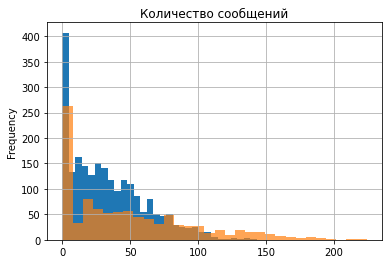

In [ ]:
gd[gd['tariff']=='smart']['messages_qty'].plot(kind = 'hist', bins=30, grid=True,title='smart').set_title('Количество сообщений'); #гистограмма по количеству сообщений для тарифа smart
gd[gd['tariff']=='ultra']['messages_qty'].plot(kind = 'hist', bins=30, grid=True, alpha=0.7); #гистограмма по количеству сообщений для тарифа ultra

In [ ]:
variance_messages_smart = np.var(gd[gd['tariff']=='smart']['messages_qty'], ddof=1) #дисперсия для данных по количеству сообщений пользователей тарифа `smart`
print (f'Дисперсия для количества сообщений по тарифу smart: {round(variance_messages_smart)}')
print (f'Стандартное отклонение для количества сообщений по тарифу smart: {round(variance_messages_smart**0.5)}') #стандартное отклонение по количеству сообщений пользователей тарифа `smart`

Дисперсия для количества сообщений по тарифу smart: 797
Стандартное отклонение для количества сообщений по тарифу smart: 28


In [ ]:
variance_messages_ultra = np.var(gd[gd['tariff']=='ultra']['messages_qty'],ddof=1) #дисперсия для данных по количеству сообщений пользователей тарифа `ultra`
print (f'Дисперсия для количества сообщений по тарифу ultra: {round(variance_messages_ultra)}')
print (f'Стандартное отклонение для количества сообщений по тарифу ultra: {round(variance_messages_ultra**0.5)}') #стандартное отклонение по количеству сообщений пользователей тарифа `ultra`

Дисперсия для количества сообщений по тарифу ultra: 2285
Стандартное отклонение для количества сообщений по тарифу ultra: 48


Абонент, пользующийся тарифом Smart отправляет в течение месяца в среднем  33 сообщений с отклонением в большую или меньшую сторону в среднем  28 сообщений. Стандартное отклонение доавольно большое - более 50% от среднего значения, что может свидетельствовать о неоднородности данных по количеству сообщений в выборке.
Касательно абонентов тарифа Ultra - они отправляют в среднем  49 сообщение и с еще большим стандартным отклонением  49 сообщений. Данные по тарифу Ultra также нельзя назвать однородными.
По гистограммам сообщений следует отметить скос данных в левую сторону, что может говорить о том, что бОльшая часть пользователей пользуются отправкой SMS довольно редко, это не самый популярный на данный момент сервис.

In [ ]:
print ('Среднемесячный расход траффика для пользователей тарифа `smart`, Мб:',gd[gd['tariff']=='smart']['traffic_used'].mean()) 
print ('Среднемесячный расход траффика для пользователей тарифа `ultra`, Мб:', gd[gd['tariff']=='ultra']['traffic_used'].mean()) 


Среднемесячный расход траффика для пользователей тарифа `smart`, Мб: 16208.386989681472
Среднемесячный расход траффика для пользователей тарифа `ultra`, Мб: 19468.80520812183


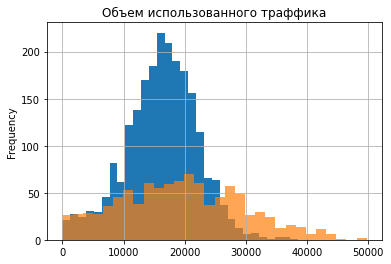

In [ ]:
gd[gd['tariff']=='smart']['traffic_used'].plot(kind = 'hist', bins=30, grid=True).set_title('Объем использованного траффика'); #гистограмма по объему использованного траффика для тарифа smart
gd[gd['tariff']=='ultra']['traffic_used'].plot(kind = 'hist', bins=30, grid=True, alpha=0.7);#гистограмма по объему использованного траффика для тарифа ultra

In [ ]:
variance_traffic_smart = np.var(gd[gd['tariff']=='smart']['traffic_used'],ddof=1) #дисперсия для данных по количеству траффика пользователей тарифа `smart`
print (f'Дисперсия по объему траффика для тарифа smart: {round(variance_traffic_smart)} Мб')
print (f'Стандартное отклонениепо объему траффика для тарифа smart: {round(variance_traffic_smart**0.5)} Мб') #стандартное отклонение по количеству траффика пользователей тарифа `smart`

Дисперсия по объему траффика для тарифа smart: 34462496 Мб
Стандартное отклонениепо объему траффика для тарифа smart: 5870 Мб


In [ ]:
variance_traffic_ultra = np.var(gd[gd['tariff']=='ultra']['traffic_used']) #дисперсия для данных по количеству траффика пользователей тарифа `ultra`
print (f'Дисперсия по объему траффика для тарифа ultra: {round(variance_traffic_ultra)} Мб')
print (f'Стандартное отклонениепо объему траффика для тарифа smart: {round(variance_traffic_ultra**0.5)} Мб') #стандартное отклонение по количеству траффика пользователей тарифа `ultra`

Дисперсия по объему траффика для тарифа ultra: 101647713 Мб
Стандартное отклонениепо объему траффика для тарифа smart: 10082 Мб


Абонент, пользующийся тарифом Smart использует в течение месяца в среднем 15,8 Гб интернета с отклонением в большую или меньшую сторону в среднем 5,7 Гб. Стандартное отклонение не очень большое - около 30% от среднего значения, данные можно считать довольно однородными. Касательно абонентов тарифа Ultra, они используют в среднем 19  Гб и с еще большим стандартным отклонением - около 10 Гб . Данные по тарифу Ultra нельзя назвать однородными. Гистограмма для пользователей тарифа Ultra показывает, что очень мало пользователей расходуют за месяц более 30 Гб, это обусловлено условиями тарифа - в стоимость включен именно этот объем траффика.

Для сравнения тарифов дополнительно построим диаграммы размаха.

In [ ]:
gd.columns

Index(['user_id', 'month', 'calls_qty', 'calls_duration', 'messages_qty',
       'traffic_used', 'tariff', 'revenue'],
      dtype='object')

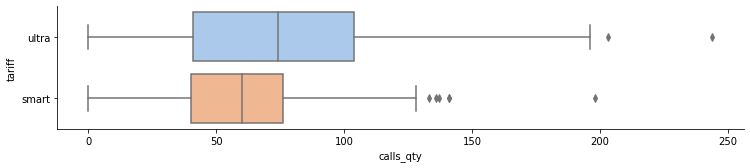

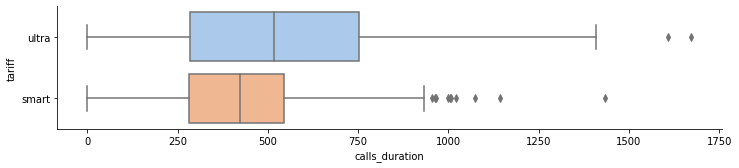

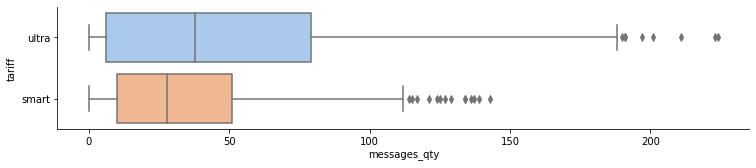

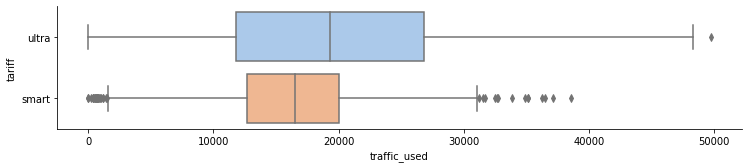

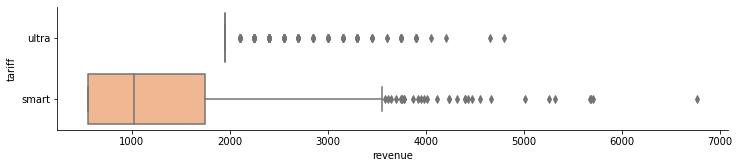

In [ ]:
for column in ['calls_qty', 'calls_duration', 'messages_qty',
       'traffic_used', 'revenue']:    
    g = sns.catplot(y='tariff', x=column, kind="box", data=gd, orient='h', palette = 'pastel')
    g.fig.set_figwidth(12)
    g.fig.set_figheight(2)

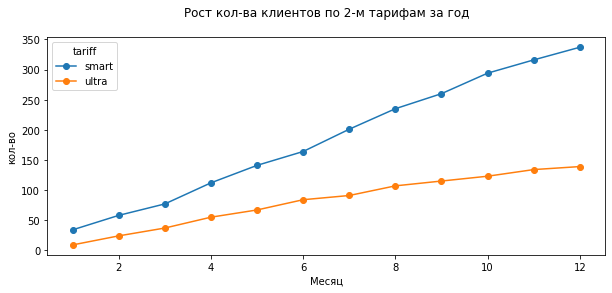

In [ ]:
(gd
 .pivot_table(index='tariff', columns='month', values='user_id', aggfunc='count')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Рост кол-ва клиентов по 2-м тарифам за год'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('кол-во');

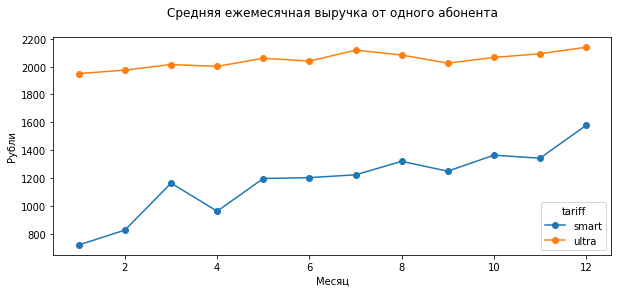

In [ ]:
(gd
 .pivot_table(index='tariff', columns='month', values='revenue', aggfunc='mean')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Средняя ежемесячная выручка от одного абонента'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Рубли');

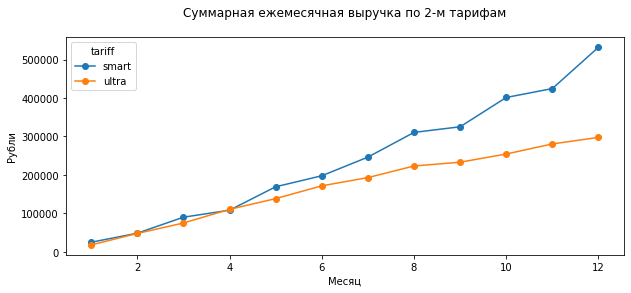

In [ ]:
(gd
 .pivot_table(index='tariff', columns='month', values='revenue', aggfunc='sum')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Суммарная ежемесячная выручка по 2-м тарифам'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Рубли');

Выручка от тарифа smart уже в два раза выше выручки от ultra, но есть опасность ухода клиентов смарта к конкурентам. Проверим текущую ситуацию.

In [ ]:
df_users = pd.read_csv('/3_users.csv')

print ('Кол-во клентов покинувших компанию за год', df_users.churn_date.notna().sum())

print ('Кол-во клентов покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах',
       df_users.query('churn_date > "2018-09-25"').churn_date.notna().sum()
      )
print ('%  от общего кол-ва всех клиентов, покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах',
    (df_users.query('churn_date > "2018-09-25"').churn_date.notna().sum()/df_users.churn_date.notna().sum()*100).round(1)
)

print ('Распределение оттока клиентов на тарифах за посл. 4 мес. 2018 г.')
df_users.query('churn_date > "2018-09-25"').groupby('tariff')['churn_date'].count().to_frame()

Кол-во клентов покинувших компанию за год 38
Кол-во клентов покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах 35
%  от общего кол-ва всех клиентов, покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах 92.1
Распределение оттока клиентов на тарифах за посл. 4 мес. 2018 г.


,churn_date
tariff,
smart,22
ultra,13


Результаты анализа подтверждают гипотезу - отток клиентов усиливается.

## Проверка гипотез

Нулевая гипотеза: средняя выручка по тарифам Ultra и Smart одинаковая.
Альтернативная гипотеза: средняя выручка по тарифу Smart отличается от  выручки по тарифу Ultra.

In [ ]:
smart = gd[gd['tariff']=='smart']['revenue'] #выборка по выручке для пользователей тарифа smart
ultra = gd[gd['tariff']=='ultra']['revenue'] #выборка по выручке для пользователей тарифа ultra
alpha = .05 # уровень статистической значимости
results = st.ttest_ind(smart,ultra,equal_var=False)
print(f'p-значение:{results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:4.2606313931076085e-250
Отвергаем нулевую гипотезу


Нулевая гипотеза о равенстве двух совокупностей по выручке от пользования за тарифы Smart и Ultra может быть отвергнута.
Для наглядности построим гистограмму распределения доходов в зависимости от используемого тарифа.

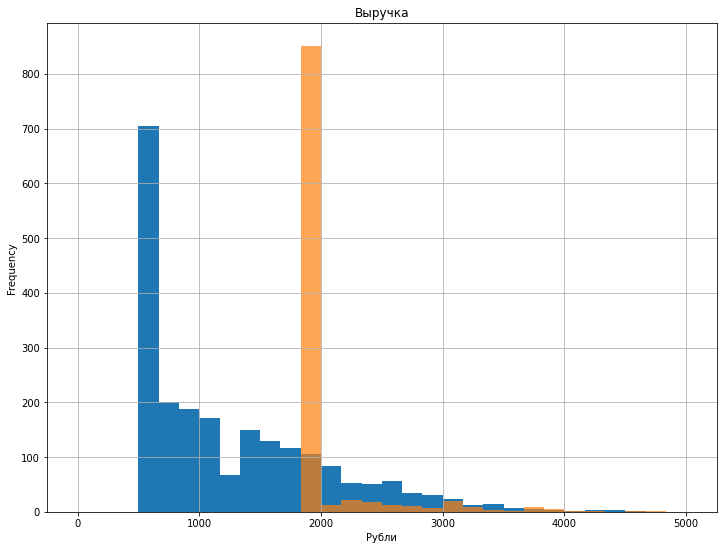

In [ ]:
gd[gd['tariff']=='smart']['revenue'].plot(kind = 'hist', range=(0,5000), bins=30, grid=True,title='Выручка',figsize=(12,9)).set_xlabel('Рубли');
gd[gd['tariff']=='ultra']['revenue'].plot(kind = 'hist',range=(0,5000), bins=30, grid=True,alpha=0.7);

Сравнение объемов полученных гистограмм наглядно показывает большую выручку от пользователей тарифа Smart (распределеение отмечено синим цветом на графике). Это связано с тем, что их доля значительно больше, чем доля пользователей тарифа Ultra, ниже подтверждение.

In [ ]:
print ('Доля абонентов тарифа Smart,%:')
round(len(gd[gd['tariff']=='smart'])/len(gd)*100,1)

Доля абонентов тарифа Smart,%:


69.4

Проверим гипотезу о том, что средняя выручка от абонентов из Москвы не отличается от выручки от абонентов из регионов. Альтернативной гипотезой в данном случае будем рассматривать наличие различий между выручкой от абонентов из Москвы и из других регионов. Для проверки нулевой гипотезы будем использовать метод о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: ttest_ind. Поскольку рассмтриваемые нами данные являются небольшой выборкой, для параметра equal_var установим значение False.

In [ ]:
gd['city'] = gd.merge(users, on='user_id')['city'] #дополним датасет `gd` данными по региону проживания абонента

In [ ]:
moscow_users = gd[gd['city']=='Москва']['revenue'] #выборка по выручке для абонентов из Москвы
other_users = gd[gd['tariff']!='Москва']['revenue'] #выборка по выручке для абонентов из других регионов
alpha = .05 # уровень статистической значимости
results = st.ttest_ind(moscow_users,other_users,equal_var=False)
print(f'p-значение:{results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:0.5989670526299272
Не получилось отвергнуть нулевую гипотезу



Полученное значение p-value (0.5452136038806226) говорит о том, что вероятность получить такое или большее различие случайно более 50%. Это слишком большая вероятность, чтобы делать вывод о значимом различии между выручкой для абонентов из разных регионов.


На основании рассматриваемых данных гипотеза о равенстве выручки для абонентов из разных регионов не может быть отвергнута. Для наглядности посмотрим на гистограммы плотностей.

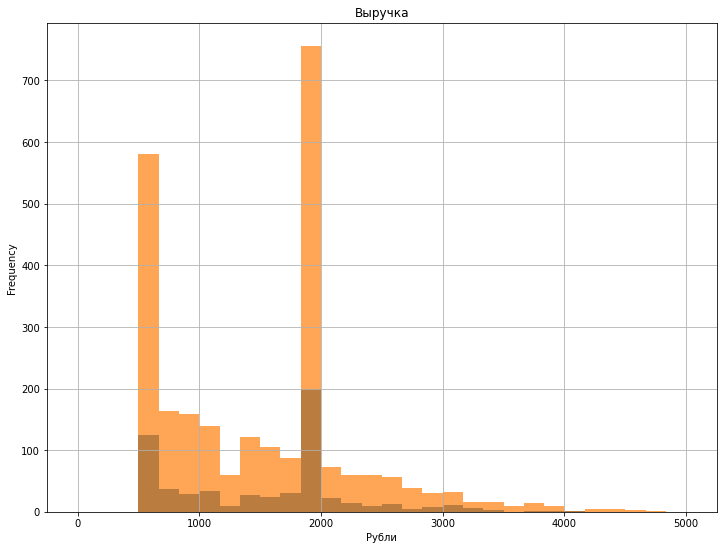

In [ ]:
gd[gd['city']=='Москва']['revenue'].plot(kind = 'hist', range=(0,5000), bins=30, grid=True,title='Выручка',figsize=(12,9)).set_xlabel('Рубли');
gd[gd['city']!='Москва']['revenue'].plot(kind = 'hist',range=(0,5000), bins=30, grid=True,alpha=0.7);

Как можно увидеть из приведенной гистограммы, распределение выручки для пользователй из Москвы и других регионов носит одинаковый характер. Размеры выручки для пользователей из Москвы ожидаемо меньше, чем для пользователей из других регионов, поскольку количество абонентов из Москвы меньше в рассматриваемой выборке ( около 20%), ниже код для подтверждения данного утверждения.

In [ ]:
print('Доля пользователей из Москвы,%:')
round(len(gd[gd['city']=='Москва']['revenue'])/len(gd)*100,1)

Доля пользователей из Москвы,%:


19.0

## Общий вывод

В ходе проведенного исследования нам удалось выяснить, что пользователи тарифа Smart в среднем разговаривют  394 минут в месяц, а для пользователей тарифа Ultra этот показатель равен  497 минутам. Оба значения укладываются в количества включенных минут по тарифам ( 500 и 3000 минут соответсвенно), но стандартное отклонение в  180 минут для выборки по тарифу Smart увеличивает вероятность превышения лимита выделенных минут в среднем на  74 минуты, что приносит Мегалайну дополнительно в среднем  74*3= 222 рубля в месяц с каждого пользователя тарифа Smart.

По количеству отправленных сообщения разница между тарифами также незначительна -  33 и  49 сообщение при лимитах в 50 и 1000 сообщений соотвественно, видимо абонентам тарифа Smart приходится себя сдерживать перед тем как написать лишнее сообщение и думать о лимите сообщений на месяц. Стандартное отклонение в  28 сообщений показывает, что в среднем пользователи тарифа Smart доплачивают по  33 рублей дополнительно за сообщения отправленные сверх лимита ( 11 сообщений сверх лимита по 3 рубля каждое).

По объему использованного траффика распределение расходов следующее:
*  smart: 15.8 Гб в месяц при лимите в 15 Гб
*  ultra: 19 Гб в месяц при лимите в 30 Гб.

Видно, что пользователям тарифа Smart выделенного по условиям тарифа траффика не хватает и они расходуют в среднем еще по 0.8 Гб в месяц, что с учетом округления до 1 Гб стоит им дополнително еще 200 рублей в месяц.

Гипотеза о различиях между выручкой от абонентов из разных регионов не подтвердилась, по всей видимости привычки людей в области общения по телефону не зависят от региона, в месяц они наговаривают, отправляют сообщения и пользуются интернетом на схожие суммы.

Гипотеза о неравенстве выручки между тарифами  не может быть отвергнута, а гистограммы распределения доходов наглядно показала, что наибольший среднемесячный доход приносят абоненты более дешевого smart`а, на них видимо и следует сделать акцент коммерческому отделу при планировании рекламного бюджета. Процентное соотношение пользователей также способствует такому выводу - пользователей тарифа Smart 70%, остальная часть подключена к тарифу Ultra.


'средняя выручка от пользователей тарифа Smart:'
Ниже сравним годовую выручку от тарифов smart и ultra.
</div>

In [ ]:
print ('Годовая выручка от пользователей тарифа Smart:',gd[gd['tariff']=='smart']['revenue'].sum()) # общая выручка от пользователей тарифа Smart
print ('Годовая выручка от пользователей тарифа Ultra:',gd[gd['tariff']=='ultra']['revenue'].sum()) # общая выручка от пользователей тарифа Ultra
print ('Средняя выручка от пользователей тарифа Smart:',gd[gd['tariff']=='smart']['revenue'].mean()) # средняя выручка от пользователей тарифа Smart
print ('Средняя выручка от пользователей тарифа Smart:',gd[gd['tariff']=='ultra']['revenue'].mean()) # средняя выручка от пользователей тарифа Ultra

Годовая выручка от пользователей тарифа Smart: 2875351.0
Годовая выручка от пользователей тарифа Ultra: 2039100.0
Средняя выручка от пользователей тарифа Smart: 1289.9735307312696
Средняя выручка от пользователей тарифа Smart: 2070.1522842639592


<div class = "alert alert-info" style="border-left: 7px solid blue">
Сравнение годовой выручки по двум тарифам подтверждает то, что наибольший объем средств поступает от пользователей тарифа Smart (на 37%), несмотря на то, что среднемесячная выручка от пользователей тарифа Ultra выше на 60%. На такие показатели влияет распределение между количествами абонентов, подключенных к тарифам - 70% пользуются тарифом Smart и лишь 30% тарифом Ultra. 
Следует отметить, что сложившаяся ситуация уже приводит к оттоку клиентов с тарифа Smart, что нужно учесть при разработке маркетинговых стратегий.
</div>